In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [43]:
median_household_income = pd.read_csv('/content/drive/My Drive/data/cleaned-data/cleaned-MedianHouseholdIncome2015.csv', encoding="windows-1252")
over_25_completed_hs = pd.read_csv('/content/drive/My Drive/data/cleaned-data/cleaned-PercentOver25CompletedHighSchool.csv', encoding="windows-1252")
people_below_poverty = pd.read_csv('/content/drive/My Drive/data/cleaned-data/cleaned-PercentagePeopleBelowPoverty.csv', encoding="windows-1252")
race_by_city = pd.read_csv('/content/drive/My Drive/data/cleaned-data/cleaned-ShareRaceByCity.csv', encoding="windows-1252")
police_killing_US = pd.read_csv('/content/drive/My Drive/data/cleaned-data/cleaned-PoliceKillingsUS.csv', encoding="windows-1252")
demographic = pd.read_csv('/content/drive/My Drive/data/cleaned-data/demographic.csv', encoding="windows-1252")
combined = pd.read_csv('/content/drive/My Drive/data/cleaned-data/combined.csv', encoding="windows-1252")
police_killing_us = pd.read_csv('/content/drive/My Drive/data/cleaned-data/police_killing_us.csv', encoding="windows-1252")

In [20]:
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29132 entries, 0 to 29131
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  29132 non-null  object 
 1   city                   29132 non-null  object 
 2   percent_completed_hs   29132 non-null  float64
 3   poverty_rate           29125 non-null  float64
 4   Median Income          27383 non-null  float64
 5   share_white            28930 non-null  float64
 6   share_black            28930 non-null  float64
 7   share_native_american  28930 non-null  float64
 8   share_asian            28930 non-null  float64
 9   share_hispanic         28930 non-null  float64
dtypes: float64(8), object(2)
memory usage: 2.2+ MB


In [21]:
demographic.describe()

,percent_completed_hs,poverty_rate,Median Income,share_white,share_black,share_native_american,share_asian,share_hispanic
count,29132.000000,29125.000000,27383.000000,28930.000000,28930.000000,28930.000000,28930.000000,28930.000000
mean,85.733805,16.444045,51177.670672,83.190149,6.882655,2.856685,1.547159,9.203426
std,11.875153,13.176623,24887.873873,21.649996,15.673815,12.627056,4.293338,17.269697
min,0.000000,0.000000,4511.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,81.000000,7.100000,35625.000000,78.500000,0.100000,0.100000,0.000000,1.200000
50%,88.400000,13.700000,45305.000000,92.500000,0.800000,0.300000,0.400000,2.900000
75%,93.500000,22.500000,59482.000000,96.900000,4.300000,0.900000,1.200000,8.000000
max,100.000000,100.000000,244083.000000,100.000000,100.000000,100.000000,67.100000,100.000000




*   85.7% of people over 25 completed high school
*   Average median income is 51177
*   16.4% of people are in poverty


In [60]:
m_white = 83.190149
m_black = 6.882655
m_share_native_american = 2.856685
m_share_asian = 1.547159
m_share_hispanic = 9.203426
m_white + m_black + m_share_native_american + m_share_asian + m_share_hispanic

103.68007399999999

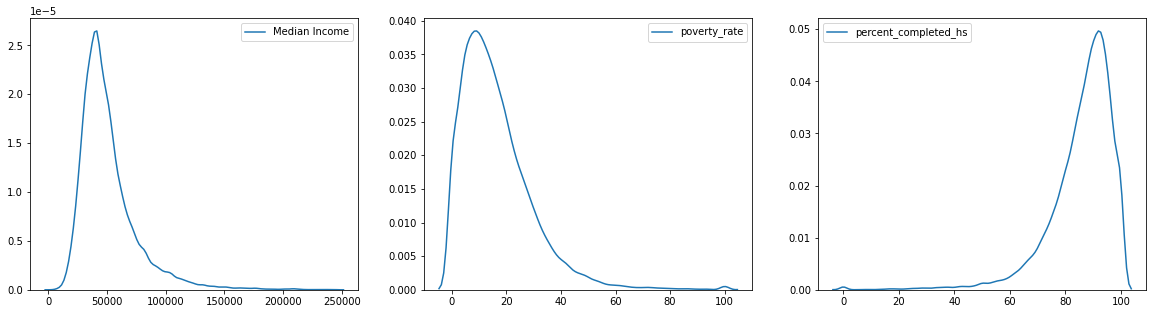

In [57]:
#demographic = demographic.dropna()
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.kdeplot(demographic['Median Income'], ax=ax[0])
sns.kdeplot(demographic['poverty_rate'], ax=ax[1])
sns.kdeplot(demographic['percent_completed_hs'], ax=ax[2])

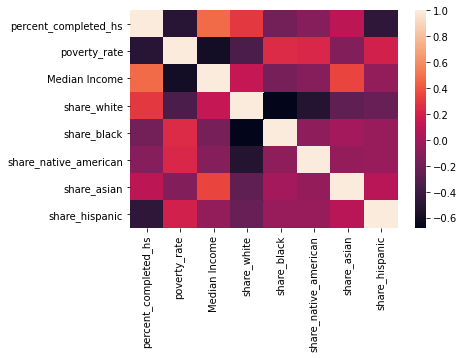

In [58]:
sns.heatmap(demographic.corr())

In [67]:
police_killing_us.info()
police_killing_us['date'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2254 entries, 0 to 2253
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       2254 non-null   int64         
 1   name                     2254 non-null   object        
 2   date                     2254 non-null   datetime64[ns]
 3   manner_of_death          2254 non-null   object        
 4   armed                    2254 non-null   object        
 5   age                      2254 non-null   float64       
 6   gender                   2254 non-null   object        
 7   race                     2254 non-null   object        
 8   city                     2254 non-null   object        
 9   state                    2254 non-null   object        
 10  signs_of_mental_illness  2254 non-null   bool          
 11  threat_level             2254 non-null   object        
 12  flee                     2254 non-

0   2015-01-02
1   2015-01-02
2   2015-01-03
3   2015-01-04
4   2015-01-04
Name: date, dtype: datetime64[ns]

In [66]:
police_killing_us['date'] = pd.to_datetime(police_killing_us['date'], format='%d/%m/%y')
